# INTRODUCTION
This data No_Show_database file consist of information of patients who present or absent on thier hospital appointment date. Looking the data carefully, you will see a column named No_show which consist of 0 value for patients that were absent with 0 value and 1 value for patients that present.
In this project, we are to inveetigate what are the reasons why patients dont make themselves available on their appointment date
This patients record is characterized by the following colums( PatiendID, AppointmentID,
Gender,	ScheduledDay,	AppointmentDay,	Age,	Neighbourhood,	Scholarship,	Hypertension,	Diabetes, Alcoholism	Handicap,	SMS_received	,	No_show ).
#The idea of this project is to be able to determined why the factors or reasons patients refused to make themselves available on thier appointment date
These are what we are going to be looking into to analyze our dataset.


# QUESTIONS

#lets know ask ourselve question what are the reasons behind absentism of patients on thier appointment day

####  QUESTION ONE
What is the percentage of those available and those that are unavailable on their appointment date??

#### QUESTION TWO
Which of the gender makes themselves unavailable most??

#### QUESTION THREE
Does the age affect the unavailability of patients??

#### QUESTION FOUR
Which of the days patient are most likely to make themselves available

The questions are widely open and 

we are goint to start our analysis now.

# Importing Libraries

In [1]:
#importing of libraries to be used in the for the analysis
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [3]:
#reading csv file from the folder
df = pd.read_csv('/Users/user/Desktop/DATA ANALYST/Database_No_show_appointments/noshowappointments-kagglev2-may-2016 - Copy.csv')
#lets have a quick look of the dataset
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


# DATA WRANGLING
This is the stage where we do a total clean up for the dataset in order to make the analysis easy and with realistic conclusion
In this project, different cleaning was done such as conversion of data type, renaming of columns, addition of columns, removal of colums.
Kindly go through codes and markdowm carefully and see how the data was wrangled.

In [4]:
#lets get the full details of our dataset
df.info()

#this actually shows us that there is no missing values, so their is no need to check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#As you can see, our dataset consist of 14 columns, 110527 rows with three different data types(float, String and int)

In [5]:
#since we have AppointmentDay & ScheduleDay to be date and they are in string format, you need to convert them to date format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format = '')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format = '')

In [6]:
#we need to check if there is any duplicate in the dataset
df.duplicated().value_counts()


False    110527
dtype: int64

In [32]:
#To check and swap if Appointment day comes before schedule date
df['AppointmentDay'] = np.where((df['AppointmentDay'] - df['ScheduledDay']).dt.days<0,df['ScheduledDay'], df['AppointmentDay'] )

In [ ]:
#Lets remove PatientID and AppointmentID as they dont have influence in our analysis
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)

In [34]:
#lets preview our dataset again
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Availability,waiting time days,weekDay,Month,Hour
0,F,2016-04-29 18:38:08+00:00,2016-04-29 18:38:08+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Unavailable,-1,Friday,April,18
1,M,2016-04-29 16:08:27+00:00,2016-04-29 16:08:27+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Unavailable,-1,Friday,April,16


In [9]:
#i would like to change the name of the column No_show to Availabilty and change the value to of No to 'Unavailable' and Yes to 'Available'
df['Availability'] = df['No-show'].apply(lambda x: 'Available' if x == 'Yes' else 'Unavailable')
df = df.drop('No-show', 1)
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Availability
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Unavailable
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Unavailable


In [35]:
#lets create a column 'Waiting time days'to get numbers of the patient will wait after the schedule date
df['waiting time days'] = df['AppointmentDay'] - df['ScheduledDay']
df['waiting time days'] = df['waiting time days'].dt.days
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Availability,waiting time days,weekDay,Month,Hour
0,F,2016-04-29 18:38:08+00:00,2016-04-29 18:38:08+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Unavailable,0,Friday,April,18
1,M,2016-04-29 16:08:27+00:00,2016-04-29 16:08:27+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Unavailable,0,Friday,April,16


In [11]:
#rename the wrong spelled columns name
df = df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap'})
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Availability,waiting time days
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Unavailable,-1


In [12]:
#create a weekday column to analyse which days of the week patients are not always available
df['weekDay'] = df['AppointmentDay'].apply(lambda x: x.weekday())
days = {'weekDay':{0: 'Monday', 1: 'Tueday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday',6: 'Sunday'}}
df.replace(days, inplace = True)

In [36]:
#create a month column to check which of the days the patient have an appointment
df['Month'] = df['AppointmentDay'].dt.month_name()
df['Hour'] = df['ScheduledDay'].dt.hour
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Availability,waiting time days,weekDay,Month,Hour
0,F,2016-04-29 18:38:08+00:00,2016-04-29 18:38:08+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Unavailable,0,Friday,April,18
1,M,2016-04-29 16:08:27+00:00,2016-04-29 16:08:27+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Unavailable,0,Friday,April,16


# EXPLANATORY DATA ANALYSIS
This is a stage where we analysis the data base on dependent and indepent variable
Different graph such as pie chart, barchart and boxplot was used and in this stage to see which of the features influence the availablity of patient on thier Appointment date

In [37]:
#let get the idea of how the data is distribution
df.describe()

#we have the highest age to be 115 & 

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,waiting time days,Hour
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9.532739,10.774517
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.027729,3.216189
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,10.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,13.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000,21.000000


<AxesSubplot:title={'center':'Gender Check'}, ylabel='None'>

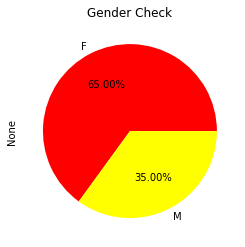

In [38]:
#check gender population of the patients
df.groupby('Gender').size().plot(kind = 'pie',autopct = '%.2f%%', title = 'Gender Check', colors = ['red', 'yellow'])


Lets makes use of pie chart because it visualized well in terms of proportionality
#It is clearly shows that the distribution have higher numbers of female patients compare to thier male counterpart, It is also infers that females visit hospitals more that males which may makes the analysis favoured female than male

<AxesSubplot:title={'center':'Attendance Check'}, ylabel='None'>

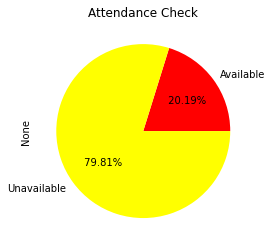

In [17]:
#check percentage of patients that Available compared to Unavailable
df.groupby(['Availability']).size().plot(kind = 'pie',y = 'Gender', title = 'Attendance Check',autopct = ' %.2f%%', colors = ['red', 'yellow'])



#we can as well see that the percentage of patients that are unavailable is higher than those available which indicates that almost 80% of patients will not be available on thier appointment date

Text(0.5, 1.0, 'Age Distribution')

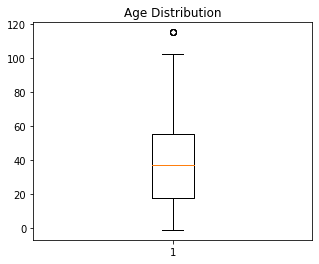

In [18]:
#check the age distribution of the dataset
age = df['Age']
fig = plt.figure(figsize = (5,4))
plt.boxplot(age)
plt.title('Age Distribution')



Lets see how varies is the Age distribution, A box plot handles this better.
This means that 50% of patient are younger than 37 and 50% are older than 37
The upper quartile value is around 55 while the lower qartile is around 18 and from the plot it can also be concluded that 50% of the patients are between the ages of 18 & 55
you can as well see that we have greatest value which is 102 & the lowest which is 0 which is obtainable since we can have children which is 3 months old and so
An outlier was also notice which is 115, therefore our boxplot is positively screw
you can see we have the median age to be around 37yrs while the most is 115yrs

{'whiskers': [<matplotlib.lines.Line2D at 0x2ae30679a30>,
 'caps': [<matplotlib.lines.Line2D at 0x2ae30687190>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ae306796a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2ae306878b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ae30687c40>],
 'means': []}

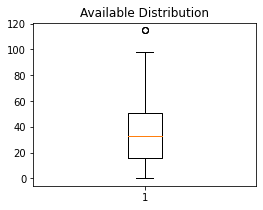

In [76]:
#check the patient that Available distribution
pre = df['Availability'] == 'Available'
df_pre = df[pre]
fig = plt.figure(figsize = (4,3))
x1 = df_pre.Age.values
plt.title('Available Distribution')
plt.boxplot(x1)

Lets see how varies is the Availabil in the distribution, A box plot handles this better.
This means that 50% of available patient are younger than 37 and 50% are older than 37
The upper quartile value is around 55 while the lower qartile is around 18 and from the plot it can also beconcluded that 50% of the patients are between the ages of 18 & 55
An outlier was also notice which is 115, therefore our boxplot is positively screw

Text(0.5, 1.0, 'Unavailable')

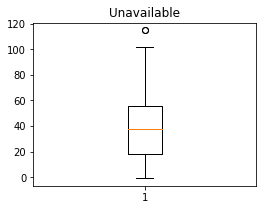

In [82]:
#check the patient that are Unavailable distribution
abse = df['Availability'] == 'Unavailable'
df_abs = df[abse]
x22 = df_abs.Age.values
fig = plt.figure(figsize = (4,3))
plt.boxplot(x22)
plt.title('Unavailable')

Lets see how varies is the  distribution, A box plot handles this better.
This means that 50% of Unavailable patient are younger than 37 and 50% are older than 37
The interquartile value is between the ranges of age 18 & 55 
therefore our boxplot is positively screw

{'whiskers': [<matplotlib.lines.Line2D at 0x2ae30910880>,
 'caps': [<matplotlib.lines.Line2D at 0x2ae30910fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ae309104f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2ae3091a700>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ae3091aa90>],
 'means': []}

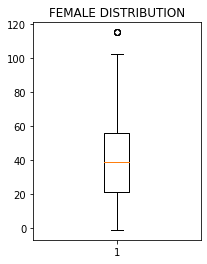

In [21]:
#check gender distribution base on age
fmale = df['Gender'] == 'F'
mmale = df['Gender'] == 'M'

df_fmale = df[fmale]
df_mmale = df[mmale]

x3 = df_fmale.Age.values
x4 = df_mmale.Age.values
fig = plt.figure(figsize = (3,4))
plt.title('FEMALE DISTRIBUTION')
plt.boxplot(x3)

Lets see how varies is the  distribution, A box plot handles this better.
This means that 50% of female patients are younger than 38 and 50% are older than 38
The upper quartile value is around 55 while the lower qartile is around 22 and from the plot it can also be concluded that 50% of the female patients are between the ages of 22 & 55
An outlier was also notice which is 115, therefore our boxplot is positively s

{'whiskers': [<matplotlib.lines.Line2D at 0x2ae3097e100>,
 'caps': [<matplotlib.lines.Line2D at 0x2ae3097e820>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ae3096ed30>],
 'medians': [<matplotlib.lines.Line2D at 0x2ae3097ef40>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ae36678310>],
 'means': []}

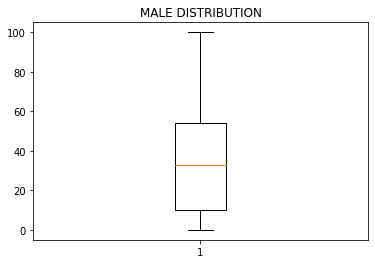

In [22]:
plt.title('MALE DISTRIBUTION')
plt.boxplot(x4)

Lets see how varies is the  distribution, A box plot handles this better.
This means that 50% of male patient are younger than 32 and 50% are older than 32
The upper quartile value is around 55 while the lower qartile is around 18 and from the plot it can also be concluded that 50% of the male patients are between the ages of 18 & 55
you can as well see that we have greatest value which is 98 and no outlier as the case may be

Text(0.5, 1.0, 'Number of patients that available on week days')

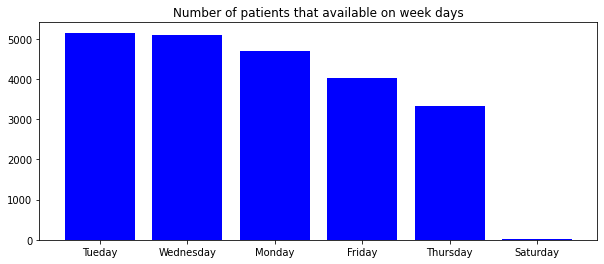

In [74]:
#checking the frquency of patient that Availability base on days
x1 = df_pre['weekDay'].value_counts().index
y = df_pre['weekDay'].value_counts().values 
fig = plt.figure(figsize = (10,4))
plt.bar(x = x1, height = y, color = 'blue')
plt.title('Number of patients that available on week days')


Lets look at which days patients do make themselves available
#it can be concluded that patients do makes themselves available on TUESDAY AND WEDNESSDAY compared to ther days

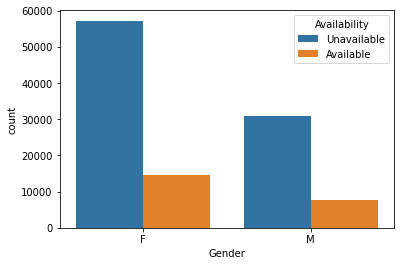

In [24]:
#checking the Availability(Available/Unavailable) using gender
ax = sns.countplot( x = 'Gender', hue = 'Availability' ,data = df)

#IT CAN BE CONCLUDED THAT FEMALE PATIENTS MOST UNAVAILABLE COMPARED TO THEIR MALE CONTERPART

Barplot is been used because it gives us room to compare values across group
lets try and check those patients that are available and unavailable using gender
The both gender have highest unavailability which shows the gender variable did not influence our analysis

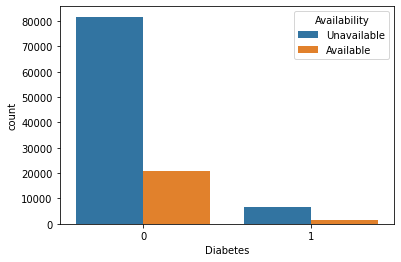

In [25]:
#check if Availability(Available/Unavailable) base on Diabetes sickness
ax = sns.countplot(x = 'Diabetes', hue = 'Availability', data = df)

Does patient with diabeties affect our availability analysis??
Oh no! 80% of people with no diabeties are not always available, so it does not have influence on our Availability

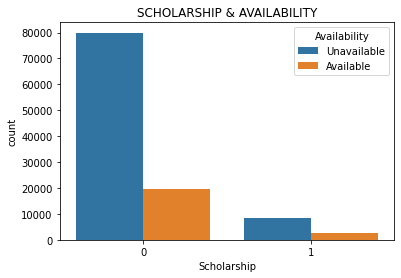

In [68]:
##check if  Availability(Available/Unavailable) base on Scholarship
plt.title('SCHOLARSHIP & AVAILABILITY')
ax = sns.countplot(x = 'Scholarship', hue = 'Availability', data = df)

In [ ]:
Does patient with scholarship our availability analysis??
Oh no! 80% of patients with no schorlarship are not always available, so it does not have influence on our Availability

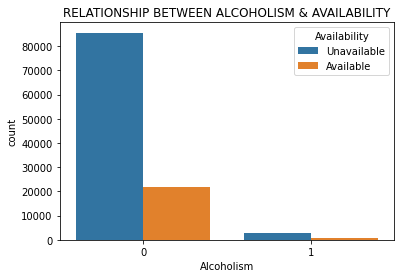

In [69]:
plt.title('RELATIONSHIP BETWEEN ALCOHOLISM & AVAILABILITY')
ax = sns.countplot(x = 'Alcoholism', hue = 'Availability', data = df)


Alcoholism did not influence our Avaialable analysis as almost 90% of patients that dont drink were unavailabe and patients that take Alc0hol are not much

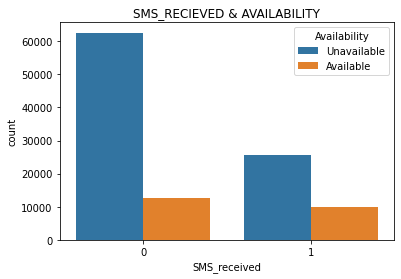

In [70]:
plt.title('SMS_RECIEVED & AVAILABILITY')
ax = sns.countplot(x = 'SMS_received', hue = 'Availability', data = df)
#SENDING SMS IS OF EQUAL IMPORTANCE TO INCREASE THE NUMBER OF AVAILABILITY

Does those that recieve SMS makes themselves available?
This chart clearly show to us 60% of those that did not recieved SMS were unavailable which i considered that if more mesages were sent, 
Number of people that will be available will increase.

Text(0, 0.5, 'Mean Age')

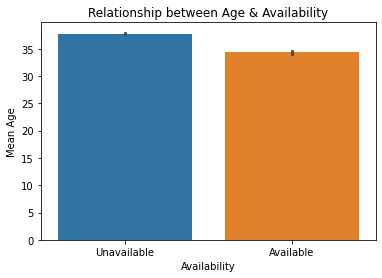

In [75]:
#Check 'Relationship between Age & Availability'
plt.title('Relationship between Age & Availability')
ax = sns.barplot(y= 'Age', x = 'Availability' , data = df)
plt.xlabel('Availability')
plt.ylabel('Mean Age')


Younger patients tends to make themselseves available compared to Older Patients as older patients 

# CONCLUSION

Judging from all these analyse, the following points was deduced
It is of importance to know that females fall sick than males with 65% dominated compared to males
Sending SMS will surely improve number of patients that will be available as it influence unavailability.
Giving out scholarship will also not influence patients availability.
It is also concluded that any patient who has appointment on saturday will be unavailabe, saturday hight have influence in the Availability
Older patients above 70 year will also unavailable as they influence our unavailabe.

# LIMITATION

In our analysis, you can see that it is females that dominated the distribution i.e 2/3, so it is very difficult make a better decision using gender.